In [195]:
# testing
import numpy as np
import importlib
import CI_Lindblad
importlib.reload(CI_Lindblad)
from matplotlib import pyplot as plt
from CI_Lindblad import CI_Lindblad


Class CI_Lindblad has been Initialized
0.9968848233904855
0.4999999999999999


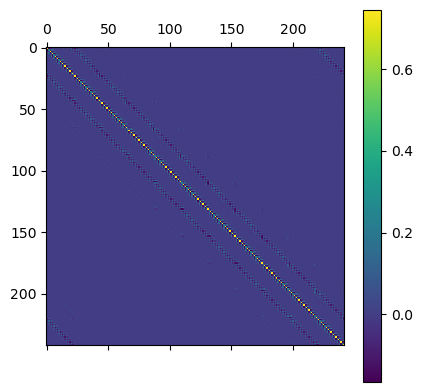

In [196]:

N = 11
solver = CI_Lindblad(Nx = N, Ny = N)
G0 = solver.G_CI()
print(solver.real_space_chern_number(G0))
print((G0.reshape(2*N**2, 2*N**2)/(2*N**2)).real.trace())
plt.matshow(G0.reshape(2*N**2, 2*N**2).real)
plt.colorbar()

max(Ggain) = 7.771561e-16
max(Gloss) = 2.498002e-16
max(Gdecoh) = 2.005516e-15


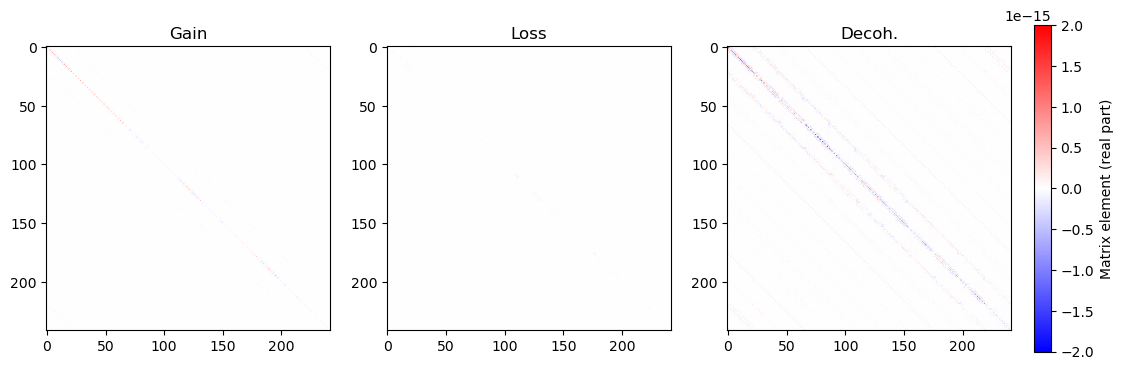

In [193]:
# Reshape to 2N^2 x 2N^2
Ggain  = solver.Lgain(G0,  n_a=0.5).reshape(2*N**2, 2*N**2).real
print(f'max(Ggain) = {np.max(np.abs(Ggain)):3e}')
Gloss  = solver.Lloss(G0,  n_a=0.5).reshape(2*N**2, 2*N**2).real
print(f'max(Gloss) = {np.max(np.abs(Gloss)):3e}')
Gdecoh = solver.Ldecoh(G0, n_a=0.5).reshape(2*N**2, 2*N**2).real
print(f'max(Gdecoh) = {np.max(np.abs(Gdecoh)):3e}')

# Symmetric global scaling
vmax = max(abs(Ggain).max(), abs(Gloss).max(), abs(Gdecoh).max())
vmin = -vmax

# 1×3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im0 = axes[0].imshow(Ggain,  vmin=vmin, vmax=vmax, cmap='bwr')
axes[0].set_title("Gain")

im1 = axes[1].imshow(Gloss,  vmin=vmin, vmax=vmax, cmap='bwr')
axes[1].set_title("Loss")

im2 = axes[2].imshow(Gdecoh, vmin=vmin, vmax=vmax, cmap='bwr')
axes[2].set_title("Decoh.")

# One shared colorbar for all three
cbar = fig.colorbar(im0, ax=axes, orientation='vertical', shrink=0.85, pad=0.02)
cbar.set_label("Matrix element (real part)")

plt.show()

In [197]:

# 4) Auto-find saturation step for alpha=1
step_idx, t_final, ch_val, G_sat = solver.find_saturation_timestep()
print(t_final)

KeyboardInterrupt: 